In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [82]:
data_train = pd.read_csv('application_train.csv')
data_test = pd.read_csv('application_test.csv')

In [83]:
data_train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
188744,318823,1,Cash loans,F,N,Y,0,67500.0,161730.0,8388.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
222635,357883,0,Cash loans,M,N,Y,0,225000.0,360000.0,22023.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
288455,434170,0,Cash loans,F,Y,N,1,450000.0,4050000.0,106839.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
81355,194333,0,Cash loans,F,N,N,0,67500.0,454500.0,14791.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
40788,147236,0,Cash loans,F,N,Y,0,60750.0,672174.0,21811.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
data_test.sample(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
18539,234671,Cash loans,M,N,Y,0,135000.0,601470.0,30838.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
28093,304992,Cash loans,F,N,Y,0,270000.0,792162.0,40576.5,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
13026,194650,Cash loans,M,Y,N,1,180000.0,728460.0,66942.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
42967,413262,Cash loans,F,N,Y,0,202500.0,675000.0,40324.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
30765,323475,Cash loans,M,Y,Y,0,180000.0,746280.0,58963.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0


In [15]:
# про що ці дані?
# Ці дані представляють собою інформацію про клієнтів, які звернулися до Home Credit Group з метою отримання кредиту. 
# Головною метою цих даних є передбачення спроможності клієнтів повернути кредит вчасно. Для цього використовуються 
# різні альтернативні дані. Наприклад, такі як: 
# - TARGET (колонка, присутня тільки в 'train'): 
#    1 - Клієнт має труднощі з погашенням кредиту. Це означає, що клієнт здійснив пізній платіж на більше X днів.
#    0 - Клієнт погашає кредит вчасно або не має серйозних проблем з погашенням кредиту.
# - FLAG_OWN_CAR та FLAG_OWN_REALTY: прапорці, чи має клієнт автомобіль або власну нерухомість
# - CNT_CHILDREN: кількість дітей у клієнта
# - AMT_INCOME_TOTAL: загальний дохід клієнта
# - AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE: величини кредиту, річних платежів та вартості товарів
# - FLAG_DOCUMENT_X: чи клієнт предоставив документ Х
# - AMT_REQ_CREDIT_BUREAU_*: кількість запитів у кредитному бюро за різні періоди часу
# ...

In [88]:
# які розподіли колонок?
data_train.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [89]:
data_test.describe(include='all')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744,48744,48744,48744,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,48305,32678,32311,33658,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,277796.676350,NaN,NaN,NaN,NaN,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,NaN,NaN,NaN,NaN,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,NaN,NaN,NaN,NaN,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,NaN,NaN,NaN,NaN,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000


In [90]:
# скільки missing values
missing_values = data_train.isnull().sum()
amt = (missing_values > 0).sum()
print(amt) 
# 67 із 122 колонок мають принаймі 1 NaN
# 62 - принаймі 1000 NaN
# 57 - принаймі 10'000 NaN
# 17 - принаймі 200'000 NaN

67


In [101]:
missing_values = data_test.isnull().sum()
amt = (missing_values > 30000).sum()
print(amt) 
# 64 із 121 колонок мають принаймі 1 NaN
# 57 - принаймі 1000 NaN
# 50 - принаймі 10'000 NaN
# 17 - принаймі 30'000 NaN

17


In [100]:
# скільки дублікатів
data_train[data_train.duplicated()] 
# нуль дублікатів

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [102]:
data_test[data_test.duplicated()] 
# нуль дублікатів

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


<Axes: xlabel='TARGET', ylabel='Count'>

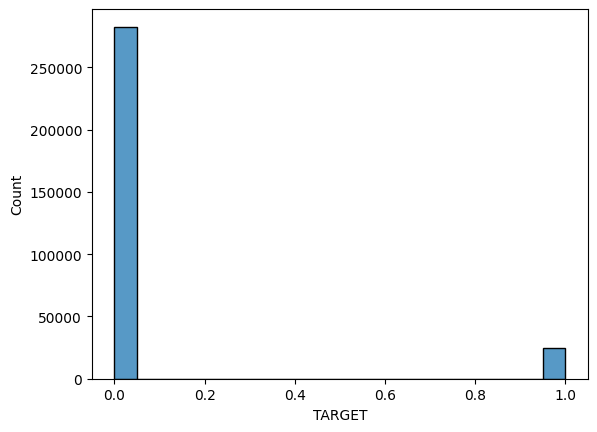

In [121]:
# наскільки збалансовані дані
sns.histplot(data_train['TARGET'], kde=False)
# очевидно, дані сильно незбалансовані

array([[<Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'APARTMENTS_AVG'}>]], dtype=object)

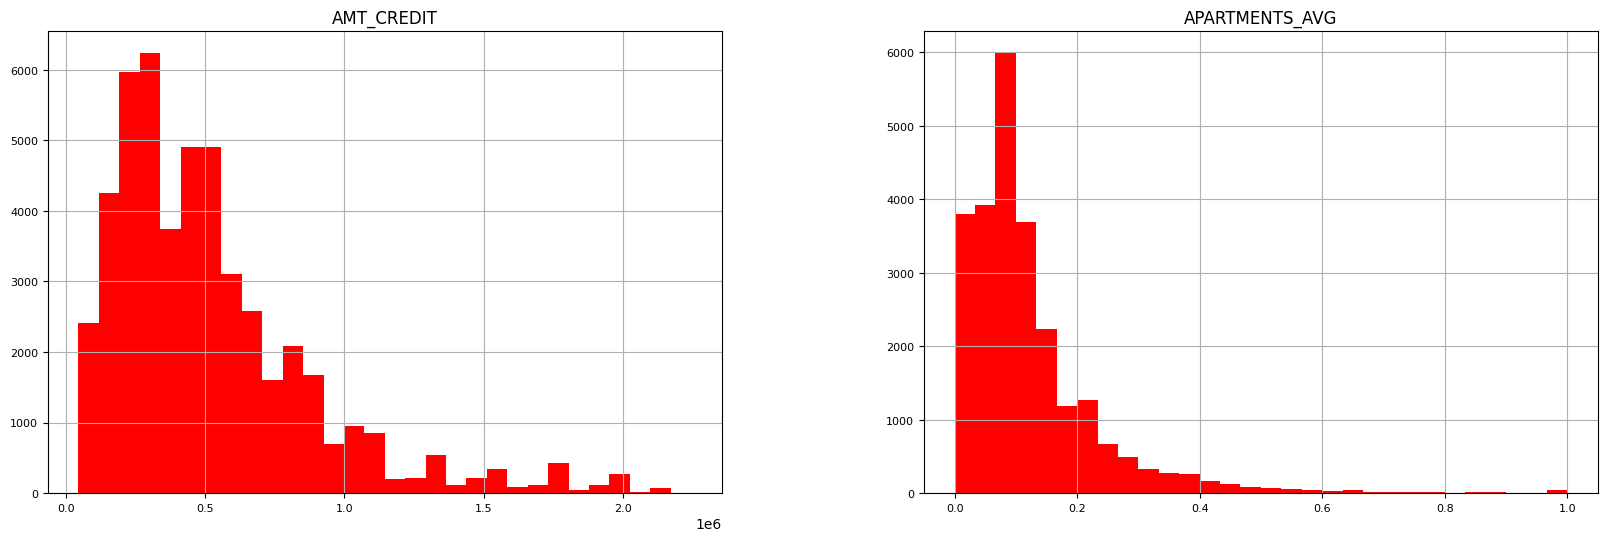

In [119]:
tmp_numerical_features = ['AMT_CREDIT', 'APARTMENTS_AVG']
data_test[tmp_numerical_features].hist(figsize=(20, 6), color='r', bins=30, xlabelsize=8, ylabelsize=8)

In [170]:
# яким чином обробити missing values
# Заміна пропущених значень середнім. 
# У випадку SimpleImputer зі стратегією 'mean', пропущені значення в числових ознаках замінюються середнім значенням цих ознак.
# imputer = SimpleImputer(strategy='mean')
# imputed_train_features = imputer.fit_transform(train_features)
# я скористаюся цим пізніше

In [171]:
# чим відрізняються train/test
# train має більше даних та цільове значення 'TARGET'

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

In [143]:
data_train.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
Length: 122, dtype: object

In [145]:
objs = data_train.select_dtypes(include=['object']).columns
for obj in objs:
    data_train[obj] = data_train[obj].astype('category')
data_train['TARGET'] = data_train['TARGET'].astype('category')
data_train.dtypes

SK_ID_CURR                       int64
TARGET                        category
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
Length: 122, dtype: object

In [146]:
numerical_features = data_train.select_dtypes(include = ['float64', 'int64']).columns
numerical_features

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)

In [154]:
train_features = data_train[numerical_features]
train_features

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
# Заміна пропущених значень середнім
imputer = SimpleImputer(strategy='mean')
imputed_train_features = imputer.fit_transform(train_features)

In [158]:
train_x, test_x, train_y, test_y = train_test_split(imputed_train_features, data_train['TARGET'], test_size=0.2)
print(f"Train: {train_x.shape}, {train_y.shape}")
print(f"Test: {test_x.shape}, {test_y.shape}")

Train: (246008, 105), (246008,)
Test: (61503, 105), (61503,)


In [159]:
sc = StandardScaler()
scaled_train_x = sc.fit_transform(train_x)
scaled_test_x = sc.transform(test_x)

In [165]:
lr = LogisticRegression()
lr.fit(scaled_train_x, train_y)

train_probs = lr.predict_proba(scaled_train_x)[:, 1]
test_probs = lr.predict_proba(scaled_test_x)[:, 1]

train_roc_auc = roc_auc_score(train_y, train_probs)
test_roc_auc = roc_auc_score(test_y, test_probs)

print(f"Train ROC-AUC: {train_roc_auc}")
print(f"Test ROC-AUC: {test_roc_auc}")
#Різниця між ROC-AUC на тренувальному та тестовому наборах не є великою, 
#що може свідчити про те, що наша модель добре узагальнюється на нових даних.

Train ROC-AUC: 0.7352837317055522
Test ROC-AUC: 0.7384909150741524


In [166]:
numerical_features = data_test.select_dtypes(include=['float64', 'int64']).columns
test_features = data_test[numerical_features]

imputer = SimpleImputer(strategy='mean')
imputed_test_features = imputer.fit_transform(test_features)

sc = StandardScaler()
scaled_test_features = sc.fit_transform(imputed_test_features)

# lr вже навчений на data_train
test_probs = lr.predict_proba(scaled_test_features)[:, 1]

# записуємо результат
result = pd.DataFrame({
    'SK_ID_CURR': data_test['SK_ID_CURR'],
    'TARGET': test_probs
})

result.to_csv('submission.csv', index=False)